In [1]:
NUMBER = 50

In [2]:
import numpy as np

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles
from sklearn.decomposition import PCA as sklearnPCA

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


- jupyter notebook
- numpy + mkl
- scipy
- scikitlearn
- matplotlib

In [3]:
# KOD 1 - generacja danych

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, NUMBER).T
assert class1_sample.shape == (3,NUMBER), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([3,3,3])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, NUMBER).T
assert class2_sample.shape == (3,NUMBER), "The matrix has not the dimensions 3x20"

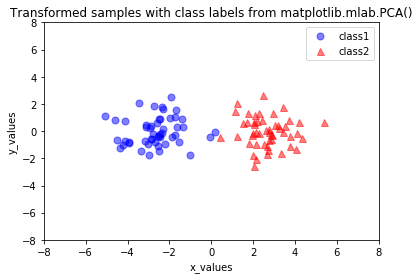

In [4]:
# KOD 3 KROK 1 PCA - konkatenacja danych (przy liczeniu PCA nie zwracamy uwagi na klasę...)

all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,NUMBER*2), "The matrix has not the dimensions 3x40"

# sKA
sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(all_samples.T)

plt.plot(sklearn_transf[0:NUMBER,0],sklearn_transf[0:NUMBER,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[NUMBER:NUMBER*2,0], sklearn_transf[NUMBER:NUMBER*2,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-8,8])
plt.ylim([-8,8])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

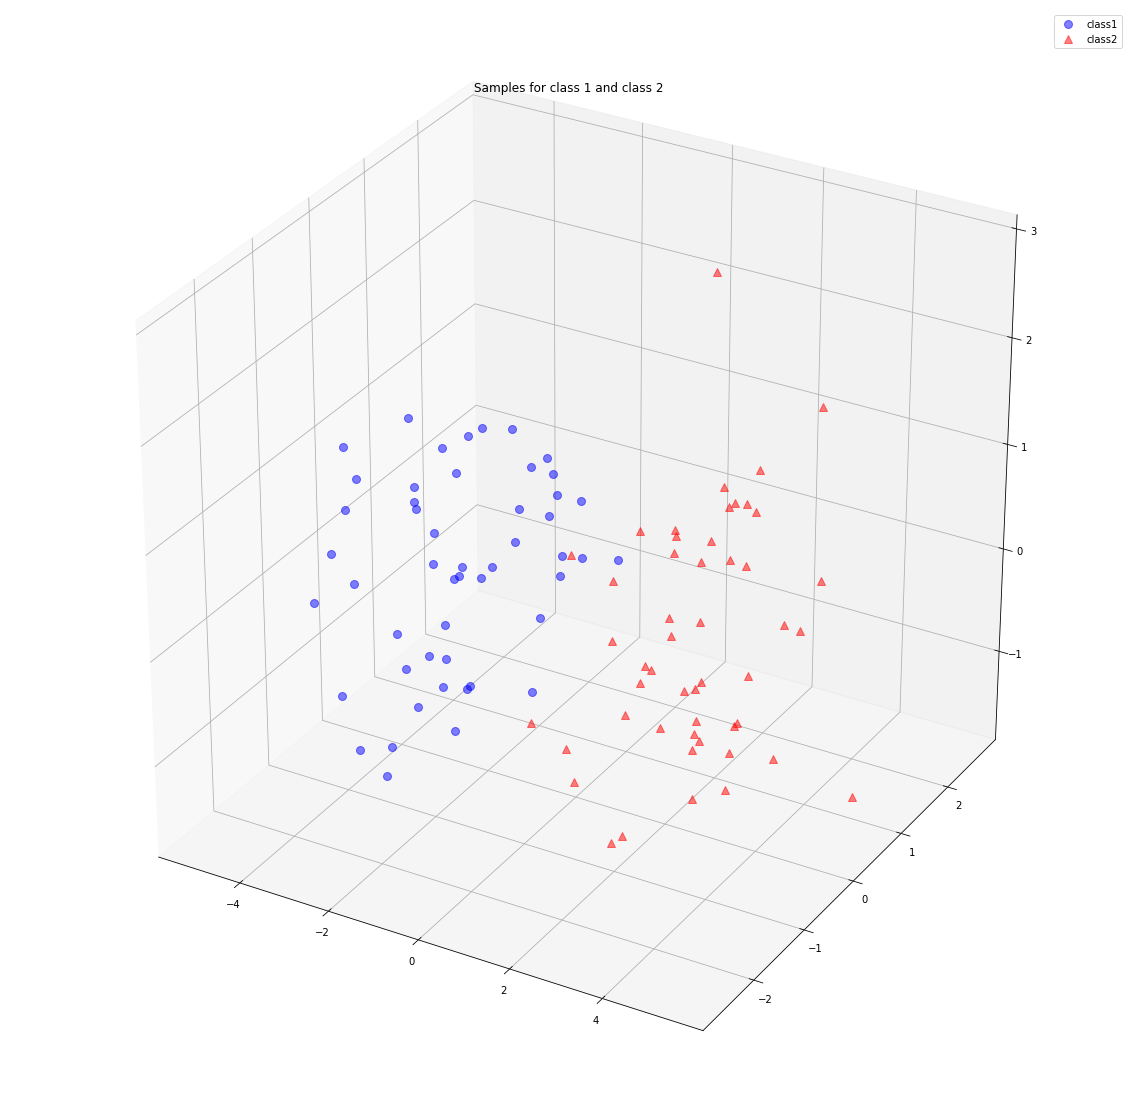

In [5]:
# KOD 2 - zwizualizowanie

sklearn_pca = sklearnPCA(n_components=3)
sklearn_transf = sklearn_pca.fit_transform(all_samples.T)


fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10
ax.plot(sklearn_transf[0:NUMBER,0],sklearn_transf[0:NUMBER,1],sklearn_transf[0:NUMBER,2], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(sklearn_transf[NUMBER:NUMBER*2,0],sklearn_transf[NUMBER:NUMBER*2,1],sklearn_transf[NUMBER:NUMBER*2,2], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

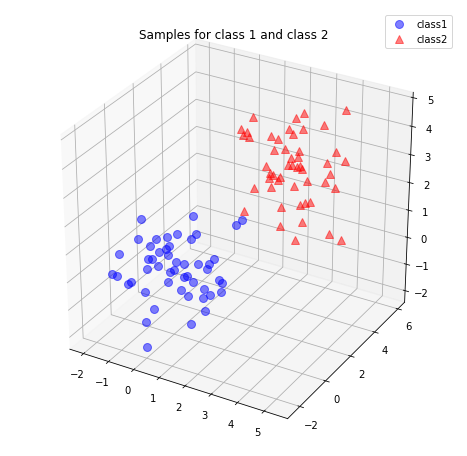

In [6]:
# KOD 2 - zwizualizowanie

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

In [7]:
# KOD 3 KROK 1 PCA - konkatenacja danych (przy liczeniu PCA nie zwracamy uwagi na klasę...)

all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,NUMBER*2), "The matrix has not the dimensions 3x40"

In [8]:
# KOD 4 KROK 2 PCA - obliczenie mean vector

mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector: ')
print(mean_vector)

Mean Vector: 
[[ 1.58538991]
 [ 1.48329119]
 [ 1.61510153]]


In [9]:
# KOD 5 KROK 3 A PCA
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix: ')
print(scatter_matrix)

Scatter Matrix: 
[[ 301.32335017  239.79827645  221.51790183]
 [ 239.79827645  347.36086422  241.867286  ]
 [ 221.51790183  241.867286    346.57840222]]


In [10]:
# KOD 5 KROK 3 B PCA

cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix: ')
print(cov_mat)

Covariance Matrix: 
[[ 3.0436702   2.42220481  2.23755456]
 [ 2.42220481  3.5086956   2.4431039 ]
 [ 2.23755456  2.4431039   3.50079194]]


In [11]:
# KOD 6 KROK 4 PCA

# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

# CHECKING MATRIX
for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[-0.54632655]
 [-0.59970732]
 [-0.58470371]]
Eigenvalue 1 from scatter matrix: 801.6305711682753
Eigenvalue 1 from covariance matrix: 8.09727849664925
Scaling factor:  99.0
----------------------------------------
Eigenvector 2: 
[[-0.75443257]
 [ 0.65557138]
 [ 0.03252176]]
Eigenvalue 2 from scatter matrix: 83.39924961855745
Eigenvalue 2 from covariance matrix: 0.842416662813715
Scaling factor:  99.0
----------------------------------------
Eigenvector 3: 
[[-0.36381148]
 [-0.45888703]
 [ 0.81059478]]
Eigenvalue 3 from scatter matrix: 110.23279581778233
Eigenvalue 3 from covariance matrix: 1.1134625840180035
Scaling factor:  99.0
----------------------------------------


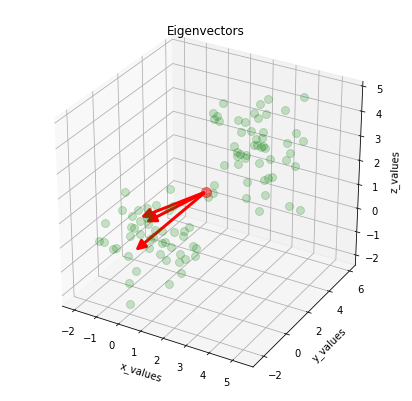

In [12]:
# DRAWING EIGEN VECTOR

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [13]:
# KOD 7 KROK 5.1 PCA
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

8.09727849665
1.11346258402
0.842416662814


In [14]:
# KOD 7 KROK 5.2 PCA
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W: ')
print(matrix_w)

Matrix W: 
[[-0.54632655 -0.36381148]
 [-0.59970732 -0.45888703]
 [-0.58470371  0.81059478]]


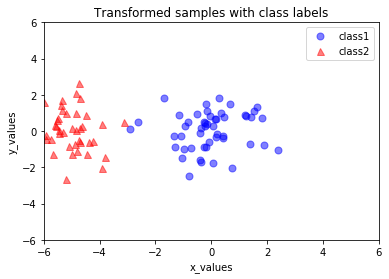

In [15]:
# KOD 8 KROK 6 PCA
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,NUMBER*2), "The matrix is not 2x40 dimensional."

plt.plot(transformed[0,0:NUMBER], transformed[1,0:NUMBER], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,NUMBER:NUMBER*2], transformed[1,NUMBER:NUMBER*2], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-6,6])
plt.ylim([-6,6])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

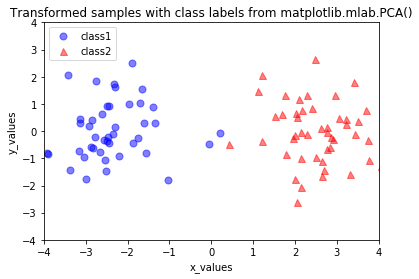

In [16]:
# to co powyżej jedną linijką

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(all_samples.T)

plt.plot(sklearn_transf[0:NUMBER,0],sklearn_transf[0:NUMBER,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[NUMBER:NUMBER*2,0], sklearn_transf[NUMBER:NUMBER*2,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()